In [1]:
import pandas as pd
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Daten = pd.read_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_2018_ber')

In [3]:
Daten.shape

(234, 211)

In [4]:
Daten.head(3)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,D-Q8b21a_7_TEXT,D-Q8b21b,D-Q8b21c,D-Q8b22a,D-Q8b22a_7_TEXT,D-Q8b22b,D-Q8b22c,D-Q9,E-Q1,porc_nan
0,2018-02-06 09:33:28,2018-02-06 09:39:02,1,NaN,100,333,1,2018-02-06 09:39:03,R_3QJg8ACLGHcD7MF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,64.285714
1,2018-02-07 13:36:43,2018-02-07 13:50:01,0,83.47.61.251,100,797,1,2018-02-07 13:50:03,R_30ugRXCZSq8xMsk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,59.523810
2,2018-02-08 02:38:26,2018-02-08 03:09:12,0,84126137166,100,1845,1,2018-02-08 03:09:13,R_1eV2zm3mlcaUK2x,NaN,...,NaN,4,NaN,NaN,NaN,NaN,NaN,2,NaN,55.238095


Glossar erstellen = Datei aufrufen (in anderem Notebook erstellt + gespeichert)

In [5]:
gloss = pd.read_pickle('D:\Daten\DISS\Daten\Gloss2018')

Funktion, um Index (Name) einer Bezeichnung im Glossar zu finden:

In [6]:
def get_name_gloss(word):
    for i, val in enumerate(gloss[0]):
        if word.lower() in str(val).lower():
            return i, gloss.index[i]

Funktion, um Bezeichnung von Index im Glossar zu finden:

In [7]:
def get_name_glossind(word):
    for i, val in enumerate(gloss.index):
        if word.lower() in str(val).lower():
            return i, gloss.loc[val][0]

In [8]:
get_name_glossind('A-Q1')

(17,
 'Probablemente, en este texto encuentre palabras o grupos de palabras que no conoce aún. Sin embargo, seguro que logra entender algunas de estas palabras nuevas sin ayuda, bien enseguida o después de pensar un poco. Lea el texto y piense qué hace para descubrir el significado o la función de las palabras que desconoce. También puede pensar en otras situaciones en las que se haya encontrado con vocabulario nuevo.  ¿Qué estrategias o técnicas usa para averiguar el significado de palabras desconocidas? ¿Qué características de las palabras, frases o textos le ayudan?               Apunte todas sus ideas aquí:')

Grafik (Histogram) anzeigen:

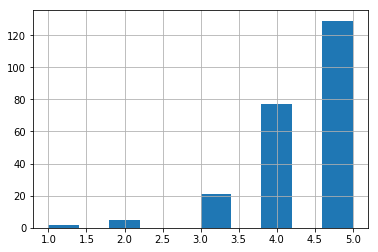

In [39]:
Daten['A-Q2_A-Q2_7'].hist()

Liste erstellen:

In [12]:
Liste_A_Q2 = [col for col in Daten.columns if 'A_Q2' in col]

In [13]:
Liste_C_Q1 = [col for col in Daten.columns if 'C_Q1' in col]

In [18]:
def graf_hist(l,sx,sy,nrow,ncol):
    fig = plt.figure(figsize=(sx,sy))
    for i, col in enumerate(l):
        plt.subplot(nrow,ncol,i+1)
        plt.hist(Daten[col].dropna(),color = '#0063A6')
        plt.xticks([1,2,3,4,5])
        plt.title(col,size=13)
    plt.show()

In [21]:
graf_hist(Liste_A_Q2,16,8,2,4)

In [23]:
Liste_A_Q3 = [col for col in Daten.columns if 'A_Q3' in col]
Liste_A_Q3.pop(3)

IndexError: pop from empty list

kann noch verbessert werden:

statt Spalte "3" (eigentlich 4, Python zählt ja ab 0) irgendwie "text"-Spalte weglassen

In [24]:
len(Liste_A_Q3)

0

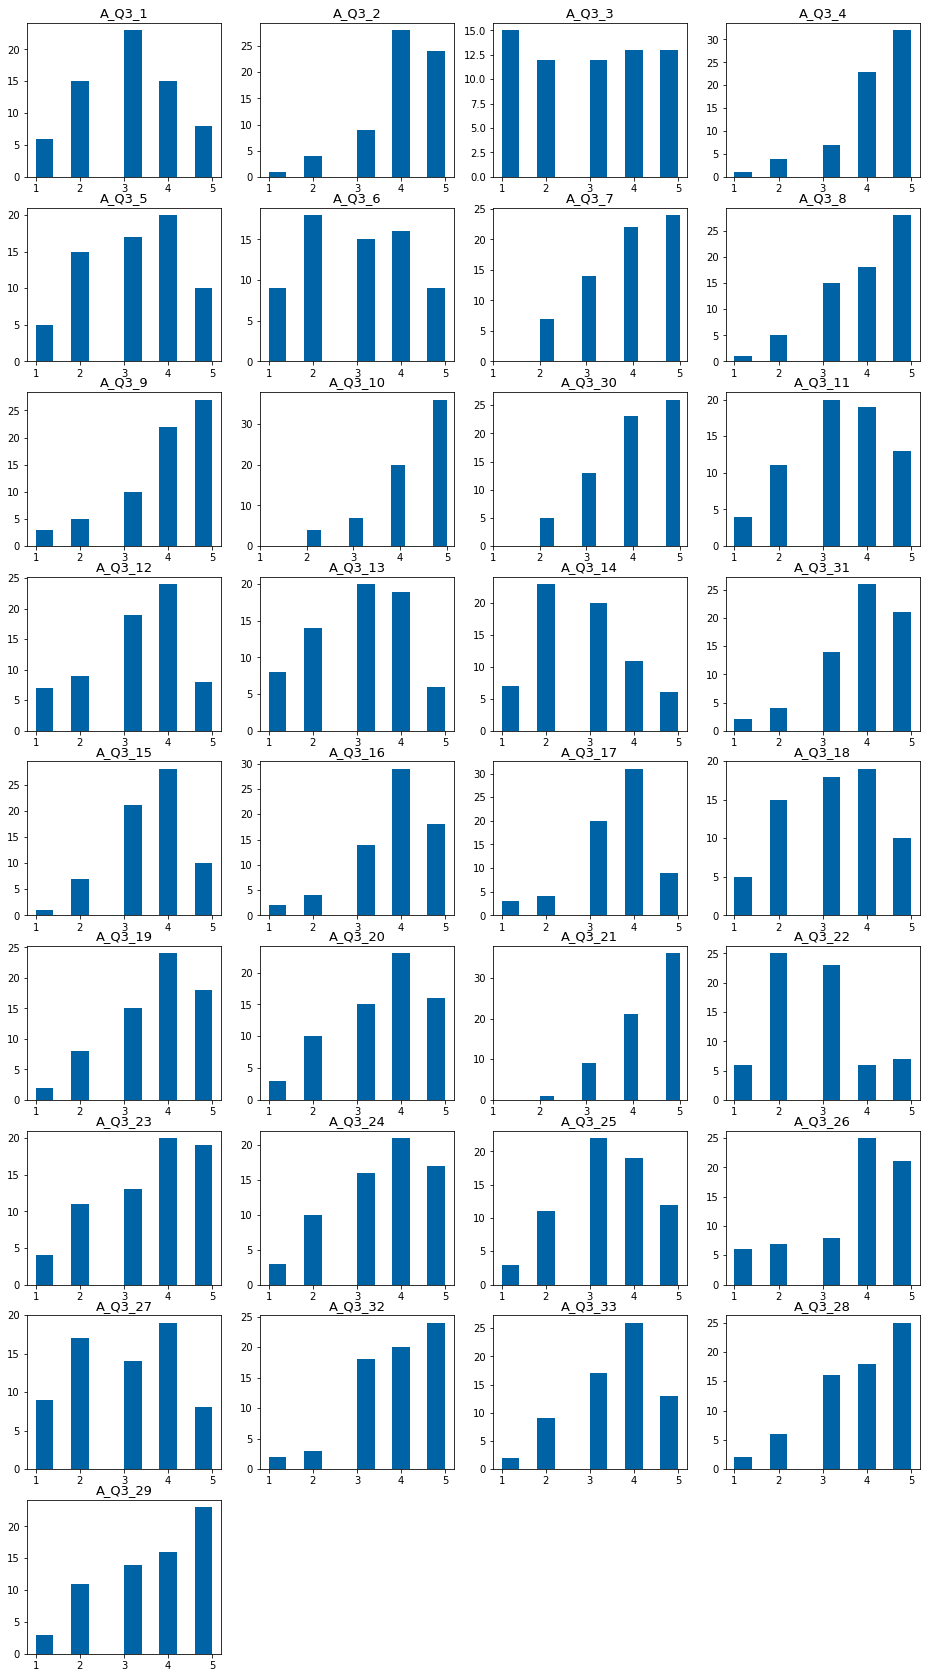

In [17]:
graf_hist(Liste_A_Q3,16,30,9,4)

In [22]:
graf_hist(Liste_C_Q1,16,12,3,4)

### Korrelation

Funktion für Korrelationen:

In [19]:
def get_Korr_M(Dat,l):
    return pd.DataFrame(np.corrcoef(Dat[l].dropna().T),columns = l, index = l)

Korrelation für A_Q2:

In [20]:
Korr_A_Q2 = get_Korr_M(Daten,Liste_A_Q2)

Korrelation für A_Q3:

In [21]:
Korr_A_Q3 = get_Korr_M(Daten,Liste_A_Q3)

In [22]:
Korr_C_Q1 = get_Korr_M(Daten,Liste_C_Q1)

Funktion, um Daten mit bestimmtem Korrelationswert (z.B. über 0,5) zu bekommen:

In [23]:
def get_max_corr(df,col,lim = 0.5):
    return df[(df[col] > lim) & (df[col].dropna() < 0.99)][col]

In [24]:
get_max_corr(Korr_A_Q3,'A_Q3_1', lim = 0.4)

A_Q3_2     0.469917
A_Q3_11    0.405196
A_Q3_12    0.423585
Name: A_Q3_1, dtype: float64

In [25]:
for col in Liste_A_Q3:
    print(get_max_corr(Korr_A_Q3,col,0.7))

Series([], Name: A_Q3_1, dtype: float64)
Series([], Name: A_Q3_2, dtype: float64)
Series([], Name: A_Q3_3, dtype: float64)
Series([], Name: A_Q3_4, dtype: float64)
Series([], Name: A_Q3_5, dtype: float64)
Series([], Name: A_Q3_6, dtype: float64)
A_Q3_9    0.70272
Name: A_Q3_7, dtype: float64
A_Q3_9    0.756879
Name: A_Q3_8, dtype: float64
A_Q3_7    0.702720
A_Q3_8    0.756879
Name: A_Q3_9, dtype: float64
Series([], Name: A_Q3_10, dtype: float64)
Series([], Name: A_Q3_30, dtype: float64)
Series([], Name: A_Q3_11, dtype: float64)
Series([], Name: A_Q3_12, dtype: float64)
Series([], Name: A_Q3_13, dtype: float64)
Series([], Name: A_Q3_14, dtype: float64)
Series([], Name: A_Q3_31, dtype: float64)
Series([], Name: A_Q3_15, dtype: float64)
Series([], Name: A_Q3_16, dtype: float64)
Series([], Name: A_Q3_17, dtype: float64)
Series([], Name: A_Q3_18, dtype: float64)
Series([], Name: A_Q3_19, dtype: float64)
Series([], Name: A_Q3_20, dtype: float64)
Series([], Name: A_Q3_21, dtype: float64)
Seri

In [26]:
get_max_corr(Korr_C_Q1,'C_Q1_1', lim = 0.4)

C_Q1_4    0.463419
Name: C_Q1_1, dtype: float64

In [27]:
for col in Liste_C_Q1:
    print(get_max_corr(Korr_C_Q1,col,0.5))

Series([], Name: C_Q1_1, dtype: float64)
C_Q1_9    0.538609
Name: C_Q1_2, dtype: float64
Series([], Name: C_Q1_3, dtype: float64)
Series([], Name: C_Q1_4, dtype: float64)
Series([], Name: C_Q1_5, dtype: float64)
Series([], Name: C_Q1_6, dtype: float64)
Series([], Name: C_Q1_7, dtype: float64)
Series([], Name: C_Q1_8, dtype: float64)
C_Q1_2    0.538609
Name: C_Q1_9, dtype: float64
Series([], Name: C_Q1_10, dtype: float64)
Series([], Name: C_Q1_11, dtype: float64)


### Cronbach's Alpha berechnen

In [25]:
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    calpha = nitems / float(nitems-1) * (1 - itemvars.sum() / float(tscores.var(ddof=1)))

    return calpha

In [26]:
CronbachAlpha(Daten[Liste_A_Q2].fillna(3))

C:\Users\Martina\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


nan

In [30]:
Liste_A_Q = Liste_A_Q2 + Liste_A_Q3

In [31]:
Liste_AC_Q = Liste_A_Q + Liste_C_Q1

In [32]:
CronbachAlpha(Daten[Liste_AC_Q].fillna(3))

0.8915924995049429

In [33]:
CronbachAlpha(Daten[Liste_C_Q1].fillna(3))

0.50860376739481084

In [34]:
CronbachAlpha(Daten[Liste_A_Q2].fillna(3))

0.4391419908909992

In [35]:
Liste_A_Q_test = Liste_A_Q3[:10]

einzelne Elemente für Liste auswählen: Name der Liste = [Bezeichnung, Bezeichnung]

* von ... bis... = Name der Liste[Zeile:Zeile]
* ab ... = Name der Liste[Zeile:]
* bis ... = Name der Liste[:Zeile]

In [36]:
CronbachAlpha(Daten[Liste_A_Q3[14:21]].fillna(3))

0.69351773563634911

In [37]:
CronbachAlpha(Daten[Liste_C_Q1[2:8]].fillna(3))

0.32030075187969931

### Zeitanalyse

#### Zeitformat ändern

In [29]:
type(Daten.EndDate[0])

datetime.datetime

In [43]:
#Daten['V8'] = pd.to_datetime(Daten.V8) - nicht nötig, wenn Dateiformat bleibt
#Daten['V9'] = pd.to_datetime(Daten.V9)

In [31]:
(Daten['EndDate'][0] - Daten['StartDate'][0]).components

AttributeError: 'datetime.timedelta' object has no attribute 'components'

zeigt Komponenten des Datetime-Formats an

#### Beantwortungszeit berechnen

In [32]:
Daten['Diff'] = (Daten['EndDate'] - Daten['StartDate']).dt.total_seconds()

neue Spalte: "Daten.Diff", die Unterschied zwischen Anfangs- und Endzeit der Beantwortung in Sekunden angibt

In [33]:
Daten.Diff.describe()

count       234.000000
mean       5006.153846
std       37486.424886
min         334.000000
25%         648.750000
50%        1082.500000
75%        1400.250000
max      535187.000000
Name: Diff, dtype: float64

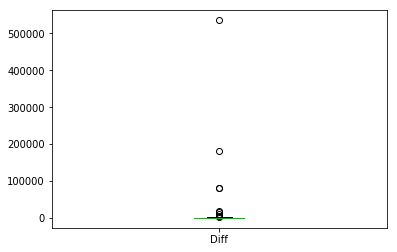

In [34]:
Daten.Diff.plot.box()

Überblick über die Beantwortungszeit und Darstellung in einem Boxplot, um Outlyers zu erkennen -> sollen nicht mit berücksichtigt werden (z.B. TN, die an einem Tag begonnen und später beendet haben...)

sinnvoll ist, eine Grenze bei ca. einer Stunde Beantwortungszeit (3600 sek) festzulegen

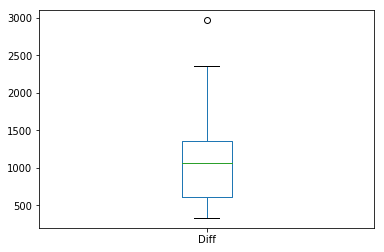

In [35]:
Daten[Daten.Diff < 4000].Diff.plot.box()

In [36]:
Daten[Daten.Diff < 4000].Diff.describe()

count     226.000000
mean     1064.880531
std       496.353511
min       334.000000
25%       619.000000
50%      1066.500000
75%      1359.750000
max      2968.000000
Name: Diff, dtype: float64

In [37]:
1065/60

17.75

Schlussfolgerung:

durchschnittliche Beantwortungszeit liegt bei ca. 24min, wobei berücksichtigt werden muss, dass TN außerhalb des Unterrichts Pausen einlegen konnten und dass z.T. bei der Beantwortung im Unterricht mehr Zeit für Erklärungen/Einloggen/Abwarten... verwendet wurde